In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [2]:
import os
print(os.listdir('../input'))

['dogs-vs-cats']


In [3]:
import zipfile

with zipfile.ZipFile('/kaggle/input/dogs-vs-cats/train.zip','r') as z:
    z.extractall('.')

In [4]:
os.mkdir('/kaggle/working/test')

In [5]:
with zipfile.ZipFile('/kaggle/input/dogs-vs-cats/test1.zip','r') as z:
    z.extractall('.')

In [6]:
# zip_file_path='/kaggle/input/dogs-vs-cats/train.zip'

In [7]:
# train_data_dir = os.path.join(os.path.dirname(zip_file_path), "train")

In [8]:
# # Specify the zip file path
# zip_file_path = "/kaggle/input/dogs-vs-cats/train.zip"

# # Extract the zip file
# with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
#     zip_ref.extractall()

# # You can now access the extracted files in the "train" directory
# train_data_dir = os.path.join(os.path.dirname(zip_file_path), "train")

In [9]:
len(os.listdir('/kaggle/working/train'))

25000

In [10]:
# path,dirs,files=next(os.walk('/content/train/train'))
# print(len(files))

In [11]:
original_dataset_dir='/kaggle/working/train'

In [12]:
# basedir='content/cats_and_dogs_small'
# os.mkdir(basedir)

In [13]:
os.mkdir('/kaggle/working/small')

In [14]:
base_dir='/kaggle/working/small'

In [15]:
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)

In [16]:
#This creates Train, Test and Validation directories with Dogs and Cats seperated
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [17]:
len(os.listdir('/kaggle/working/train'))

25000

In [18]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(10000,11250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(11250, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 11250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(11250, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [19]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 10000
total training dog images: 10000
total validation cat images: 1250
total validation dog images: 1250
total test cat images: 1250
total test dog images: 1250


Moving files into a seperate folder for test submission

In [20]:
# os.mkdir('/kaggle/working/test/test1')
# test_original='/kaggle/working/test1'
# test_final='/kaggle/working/test/test1'

# fnames = ['{}.jpg'.format(i) for i in range(1,12501)]
# for fname in fnames:
#     src = os.path.join(test_original, fname)
#     dst = os.path.join(test_final, fname)
#     #print(src,dst)
#     shutil.copyfile(src, dst)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling,Dense,Conv2D,Flatten,Dropout,BatchNormalization,MaxPooling2D
from tensorflow import keras



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model Creation

In [22]:
model=Sequential()
# model.add(Rescaling(1./255))
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                        

In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Data Preprocessing

In [24]:
from tensorflow.keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

In [25]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

Using 224x224 as VGG prefers this size

In [26]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 20000 images belonging to 2 classes.


In [27]:
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 2500 images belonging to 2 classes.


In [28]:
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 2500 images belonging to 2 classes.


In [29]:
%%script False
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=20,validation_data=validation_generator,validation_steps=10)

Couldn't find program: 'False'


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# pd.DataFrame(history.history).plot(kind='line')

In [32]:
from keras.applications import VGG19

In [33]:
conv_base=VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))

80134624/80134624 [==============================] - 0s 0us/step


In [34]:
conv_base.trainable=False

In [35]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [36]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26447425 (100.89 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [38]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=20,validation_data=validation_generator,validation_steps=10)

/tmp/ipykernel_42/2251854157.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=20,validation_data=validation_generator,validation_steps=10)


Epoch 1/20
100/100 [==============================] - 40s 280ms/step - loss: 0.8386 - accuracy: 0.7185 - val_loss: 0.2969 - val_accuracy: 0.8900
Epoch 2/20
100/100 [==============================] - 28s 280ms/step - loss: 0.4557 - accuracy: 0.8065 - val_loss: 0.4524 - val_accuracy: 0.8250
Epoch 3/20
100/100 [==============================] - 28s 281ms/step - loss: 0.4946 - accuracy: 0.8055 - val_loss: 0.3045 - val_accuracy: 0.8850
Epoch 4/20
100/100 [==============================] - 28s 283ms/step - loss: 0.3992 - accuracy: 0.8255 - val_loss: 0.2834 - val_accuracy: 0.8900
Epoch 5/20
100/100 [==============================] - 28s 278ms/step - loss: 0.4109 - accuracy: 0.8155 - val_loss: 0.1992 - val_accuracy: 0.9150
Epoch 6/20
100/100 [==============================] - 29s 284ms/step - loss: 0.3783 - accuracy: 0.8085 - val_loss: 0.3029 - val_accuracy: 0.8800
Epoch 7/20
100/100 [==============================] - 28s 278ms/step - loss: 0.3894 - accuracy: 0.8245 - val_loss: 0.2131 - val_ac

<Axes: >

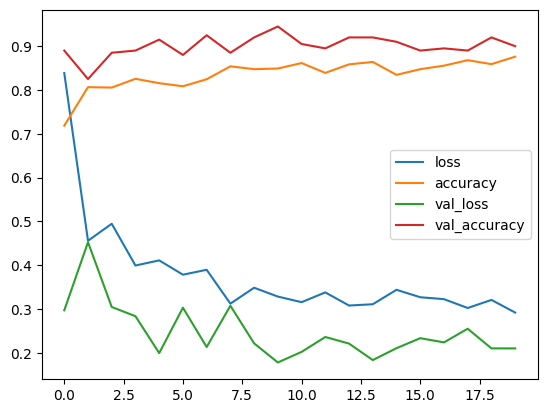

In [39]:
pd.DataFrame(history.history).plot(kind='line')

In [40]:
model.evaluate(validation_generator)

125/125 [==============================] - 18s 141ms/step - loss: 0.2164 - accuracy: 0.9088


[0.21635837852954865, 0.9088000059127808]

In [41]:
# test_datagen=ImageDataGenerator(rescale=1./255)
# train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')fro

In [52]:
from keras.applications import ResNet50

In [42]:

# test1_dir=('/kaggle/working/test')
# test1_datagen=ImageDataGenerator(rescale=1./255)
# # test1_generator=test1_datagen.flow_from_directory(test1_dir,target_size=(224,224),batch_size=20,class_mode='input')

Found 0 images belonging to 0 classes.


In [53]:
resnet=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [54]:
resnet.trainable=False

In [55]:
model=Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 256)               25690368  
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 49278337 (187.98 MB)
Trainable params: 25690625 (98.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [57]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
history2=model.fit(train_generator,steps_per_epoch=100,epochs=20,validation_data=validation_generator,validation_steps=10)

Epoch 1/20
100/100 [==============================] - 32s 273ms/step - loss: 1.7124 - accuracy: 0.5295 - val_loss: 1.1272 - val_accuracy: 0.5250
Epoch 2/20
100/100 [==============================] - 27s 267ms/step - loss: 0.7695 - accuracy: 0.5930 - val_loss: 0.7202 - val_accuracy: 0.5600
Epoch 3/20
100/100 [==============================] - 27s 266ms/step - loss: 0.7676 - accuracy: 0.5680 - val_loss: 0.6792 - val_accuracy: 0.6150
Epoch 4/20
100/100 [==============================] - 27s 274ms/step - loss: 0.7600 - accuracy: 0.5915 - val_loss: 0.7328 - val_accuracy: 0.5650
Epoch 5/20
100/100 [==============================] - 27s 267ms/step - loss: 0.7954 - accuracy: 0.5480 - val_loss: 0.6940 - val_accuracy: 0.5700
Epoch 6/20
100/100 [==============================] - 27s 268ms/step - loss: 0.6856 - accuracy: 0.6010 - val_loss: 0.6713 - val_accuracy: 0.5950
Epoch 7/20
100/100 [==============================] - 28s 275ms/step - loss: 0.6988 - accuracy: 0.6095 - val_loss: 0.9537 - val_ac

In [59]:
model.evaluate(validation_generator)

125/125 [==============================] - 10s 76ms/step - loss: 0.6902 - accuracy: 0.5668


[0.6902049779891968, 0.5667999982833862]

In [ ]:
pd.DataFrame(history2.history).plot(kind='line')